Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/1000
39/39 [==============================] - 0s 5ms/step - loss: 1786.2664 - mse: 1786.2664 - val_loss: 865.7028 - val_mse: 865.7028
Epoch 2/1000
39/39 [==============================] - 0s 2ms/step - loss: 1513.5560 - mse: 1513.5560 - val_loss: 590.9297 - val_mse: 590.9297
Epoch 3/1000
39/39 [==============================] - 0s 3ms/step - loss: 900.3921 - mse: 900.3921 - val_loss: 222.1713 - val_mse: 222.1713
Epoch 4/1000
39/39 [==============================] - 0s 2ms/step - loss: 342.9123 - mse: 342.9123 - val_loss: 241.7497 - val_mse: 241.7497
Epoch 5/1000
39/39 [==============================] - 0s 2ms/step - loss: 249.9673 - mse: 249.9673 - val_loss: 255.5288 - val_mse: 255.5288
Epoch 6/1000
39/39 [==============================] - 0s 2ms/step - loss: 234.9682 - mse: 234.9682 - val_loss: 236.0115 - val_mse: 236.0115
Epoch 7/1000
39/39 [=====

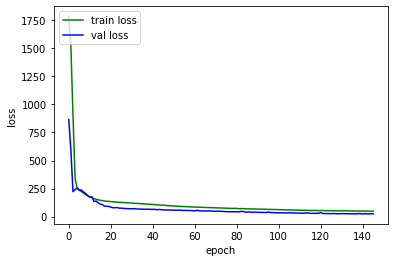

RMSE of train: 6.936
RMSE of val  : 4.927
RMSE of test : 10.416


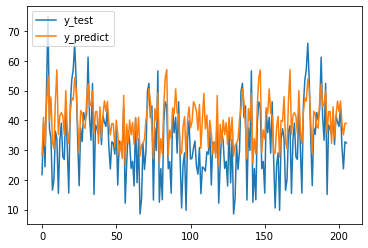

     y_test  y_predict
0     21.75  28.180693
1     39.09  41.046181
2     24.39  31.334879
3     50.51  44.903419
4     74.99  55.038761
..      ...        ...
201   44.28  46.489002
202   31.18  39.229736
203   23.70  35.096649
204   32.77  38.949512
205   32.40  38.966484

[206 rows x 2 columns]


In [13]:
# -*- coding:utf-8 -*-
# 2020 IT 서비스 신기술 실습
# DNN_Regression3
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 분할 함수
def split(data):
    train_size = int(len(data)*0.6)
    val_size = int(len(data)*0.8)
    data_train = data[:train_size]
    data_val = data[train_size:val_size]
    data_test = data[val_size:]
    return data_train, data_val, data_test

# 데이터 정규화 함수
def normalization(data_train, data_val, data_test):
    scaler = MinMaxScaler() #StandardScaler
    scaler.fit(data_train)
    n_data_train = scaler.transform(data_train)
    n_data_val = scaler.transform(data_val)
    n_data_test = scaler.transform(data_test)
    return n_data_train, n_data_val, n_data_test

# 모델 설계 함수
def build_reg_model(x_train):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# 모델 학습 함수
def learning(x_train, y_train, x_val, y_val):
    callbacks_list = [
            EarlyStopping(monitor='val_loss', patience=5,),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss',
            save_best_only=True, )]
    hist = model.fit(x_train, y_train, epochs=1000, batch_size = 16,
                    callbacks=callbacks_list, validation_data=(x_val,y_val))
    return hist

# 학습 시각화 함수
def learning_graph(hist):
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'],'g', label='train loss')
    loss_ax.plot(hist.history['val_loss'],'b', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    plt.show()

# 함수 활용 실행
# 랜덤시드 고정
np.random.seed(5)

# 데이터 로드
dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/deep/concrete.csv')
dataset = dataset.values
x = dataset[:,:8]
y = dataset[:,8]

x_train, x_val, x_test = split(x)
y_train, y_val, y_test = split(y)

x_train, x_val, x_test = normalization(x_train, x_val, x_test)
model = build_reg_model(x_train)
hist = learning(x_train, y_train, x_val, y_val)
learning_graph(hist)

# 예측 및 모델 평가
y_predict = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_predict, y_test))

print("RMSE of train: %.3f"%np.sqrt(hist.history['loss'][-1]))
print("RMSE of val  : %.3f"%np.sqrt(hist.history['val_loss'][-1]))
print("RMSE of test : %.3f"%(rmse))

# 실제값, 예측값 그래프
fig, loss_ax = plt.subplots()
loss_ax.plot(y_test, label='y_test')
loss_ax.plot(y_predict, label='y_predict')
loss_ax.legend(loc='upper left')
plt.show()

df = pd.DataFrame(y_test)
df.insert(1,'y_predict',y_predict)
df.rename(columns={0:'y_test'}, inplace=True)
print(df)